# DATA PREPROCESSING

Importing the required model to see the Dataframe

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Creating a raw dataframe

In [3]:
df_raw=pd.read_csv('/content/drive/MyDrive/Guvi Projects/twitter_new.csv',encoding='latin-1')

In [4]:
df_raw

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [5]:
#looking into the dataframe for the information like dtypes and so on
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
#Checking for the null values
df_raw.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [7]:
#Checking the value counts of the target column
df_raw.target.value_counts()

0    800000
4    800000
Name: target, dtype: int64

By seeing this we can say that there is only two values are there like 0 is for negative and 4 is positive,so there is no other value like nuetral as given in our problem statement  

In [8]:
#Mapping the target values for our prediction 
df_raw['target'] = df_raw['target'].map({0: 0, 4: 1})

In [9]:
# Ommiting every column except for the text and the label, as we won't need any of the other information
df = df_raw[['target', 'text']]
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [10]:
# Seperating positive and negative rows
df_pos = df[df['target'] == 1]
df_neg = df[df['target'] == 0]
print(len(df_pos), len(df_neg))

800000 800000


In [11]:
# Only retaining 1/2 of our data from each output group
# Since my system is not that much compatible to run 1.6 million tweets i am dividing the data set by half
df_pos = df_pos.iloc[:int(len(df_pos)/2)]
df_neg = df_neg.iloc[:int(len(df_neg)/2)]
print(len(df_pos), len(df_neg))

400000 400000


In [12]:
# Concatinating both positive and negative groups and storing them back into a single dataframe
df = pd.concat([df_neg,df_pos])
len(df)

800000

In [13]:
#After spliting again checking for null values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#checking the target column whether it splited even or not
df.target.value_counts()

0    400000
1    400000
Name: target, dtype: int64

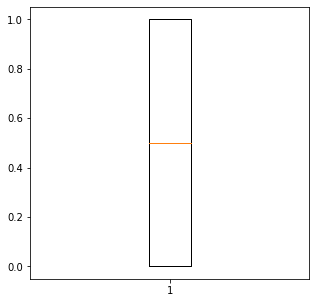

In [15]:
#Fitting box plot to see the distribution of target values
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.target)
plt.show()

In [16]:
#Creating a new column to see the length of each tweets
df['pre_clean_len'] = [len(t) for t in df.text]

In [ ]:
df['pre_clean_len']

0          115
1          111
2           89
3           47
4          111
          ... 
1199995     77
1199996     94
1199997     80
1199998     17
1199999     58
Name: pre_clean_len, Length: 800000, dtype: int64

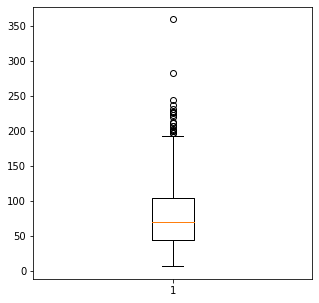

In [ ]:
#Here we can see many tweets are in outliers range
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [ ]:
#Since the previous version of twitter can allow only 140 letters,here we are seeing the tweets which are all have more than 140 letters
df[df.pre_clean_len > 140]

,target,text,pre_clean_len
213,0,Awwh babs... you look so sad underneith that s...,142
226,0,Tuesdayï¿½ll start with reflection ï¿½n then a...,141
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144
...,...,...,...
1199687,1,@mrsvc_sp and ALL: http://www.battle.oxoniensi...,147
1199768,1,&gt;&gt;&gt;T.G.I.Fridays..hve to go wit this ...,146
1199815,1,Aldi's reusable grocery bags = strong enough 2...,141
1199925,1,@mlwebb &quot;Is that digger&quot;. Who is Dig...,148


Here we are doing a NLP process there is no need to remove the outleirs.if we do so we may lost some of the valueble information for the predictions

In [ ]:
df.drop(['pre_clean_len'],axis=1,inplace=True)

In [ ]:
df

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1199995,1,@misstinayao...im doin the same...so well defi...
1199996,1,Finding life's simple delights in the midst of...
1199997,1,@McLovin143 just tell me when your on your wa...
1199998,1,goodbye downtown


In [ ]:
#Checking the text columns to perform the cleaning process
df.head(30)

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


Here we are doing the cleaning process of removing the below texts in tweets
1.Converting the tweets into lower
2.rmoving the URL,Usernames,UTF,Numbers,Single characters,Punctuations and so on

In [17]:
import re
import html

def process_tweet(tweet):
    tweet = tweet.lower()                                             # Lowercases the string
    tweet = tweet.lstrip('\ufeff')                                    # Remove UTF-8 BOM if present
    tweet = re.sub('@[^\s]+', '', tweet)                              # Removes usernames
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)   # Remove URLs
    tweet = re.sub(r"\d+", " ", str(tweet))                           # Removes all digits
    tweet = re.sub('&quot;'," ", tweet)                               # Remove (&quot;) 
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))                   # Removes all single characters
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))                       # Removes all punctuations
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)                         # Convert more than 2 letter repetitions to 2 letter
    tweet = re.sub(r"\s+", " ", str(tweet))                           # Replaces double spaces with single space    
    return tweet

Creating a new column for the processed tweets

In [18]:
df['processed_tweets'] = df['text'].apply(process_tweet)

In [19]:
# Re ordering columns
df = df[['target','processed_tweets','text']]
df

,target,processed_tweets,text
0,0,aww that bummer you shoulda got david carr of...,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can update his facebook by te...,is upset that he can't update his Facebook by ...
2,0,dived many times for the ball managed to save...,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,no it not behaving at all mad why am here bec...,"@nationwideclass no, it's not behaving at all...."
...,...,...,...
1199995,1,doin the same so well definately gettup this ...,@misstinayao...im doin the same...so well defi...
1199996,1,finding life simple delights in the midst of h...,Finding life's simple delights in the midst of...
1199997,1,just tell me when your on your way ll keep ch...,@McLovin143 just tell me when your on your wa...
1199998,1,goodbye downtown,goodbye downtown


Removing the words which are all less than or equal to two letters

In [20]:
df['processed_tweets'] = df['processed_tweets'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))


Removing Stopwords

In [21]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english') 
stop_words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
# Function to remove stop words 
def remove_stopwords(text):
    tweets_tokenized = word_tokenize(text)
    tweets_new = " ".join([i for i in tweets_tokenized  if i not in stop_words])
    return tweets_new

# Removing stopwords
df['processed_tweets'] = [remove_stopwords(r) for r in df['processed_tweets']]

# Lemmatization 

In [23]:

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [24]:
# Finding the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  # output will be a list of tuples -> [(word,detailed_tag)]
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged) # output -> [(word,shallow_tag)]
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['processed_tweets'] = df['processed_tweets'].apply(lambda x: lemmatize_sentence(x))


## Plotting most frequent words from positive and negative reviews using bar chart


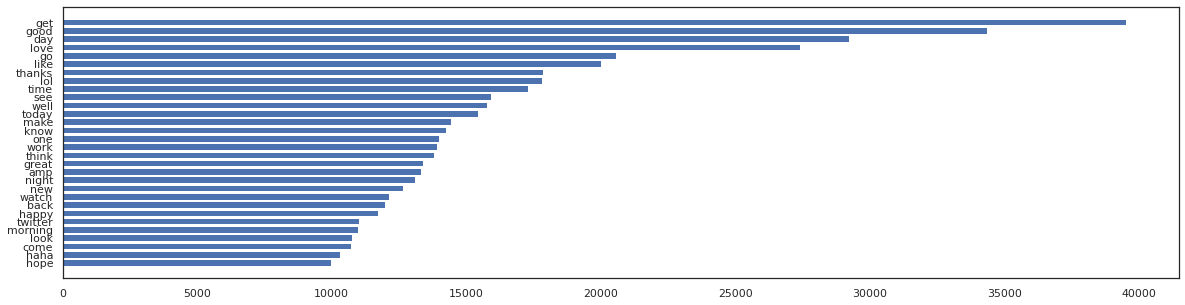

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['target'] == 1,:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['processed_tweets']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

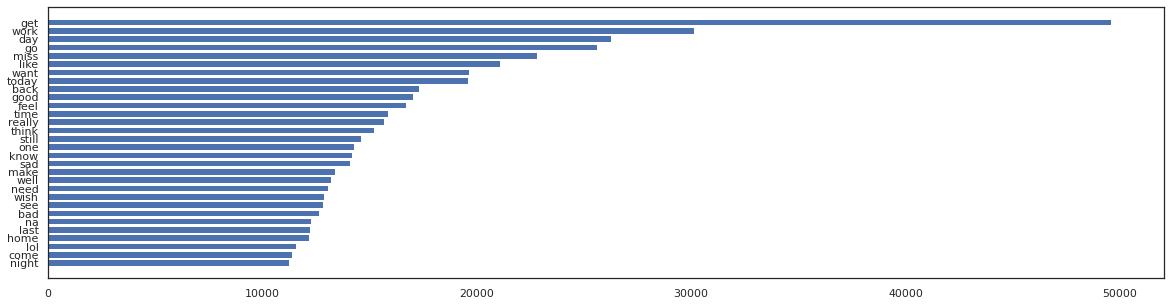

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['target'] == 0,:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['processed_tweets']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()


## Word Cloud for the positive and negative frequent words

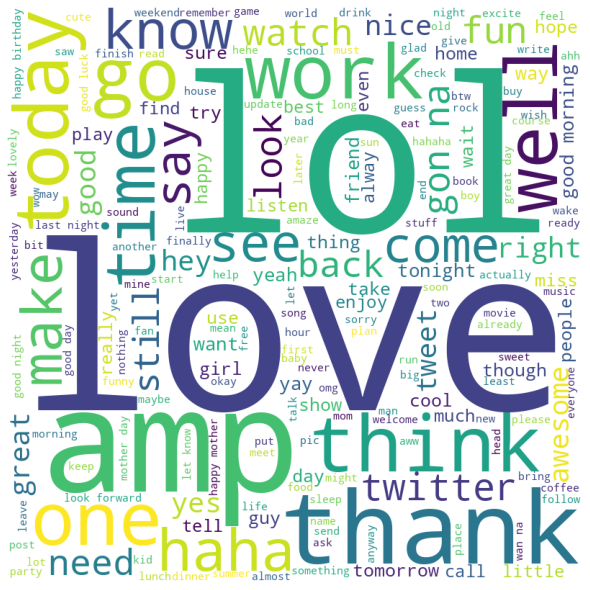

In [27]:
from wordcloud import WordCloud
word_cloud_df = df.loc[df['target'] == 1,:]
all_words = ' '.join([text for text in word_cloud_df['processed_tweets']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

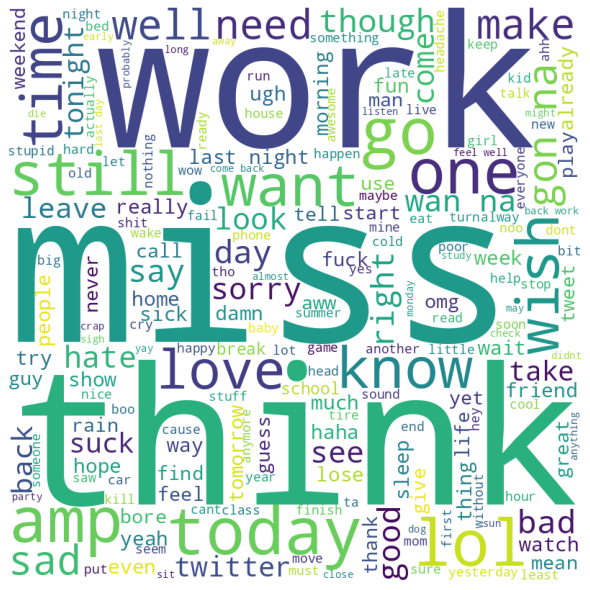

In [28]:
from wordcloud import WordCloud
word_cloud_df = df.loc[df['target'] == 0,:]
all_words = ' '.join([text for text in word_cloud_df['processed_tweets']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

#MODEL TRAINING, TESTING, EVALUTION 



In [29]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,2))    # Unigram and Bigram
final_vectorized_data = count_vectorizer.fit_transform(df['processed_tweets'])  
final_vectorized_data

<800000x2078576 sparse matrix of type '<class 'numpy.int64'>'
	with 9593266 stored elements in Compressed Sparse Row format>

#Spliting the data into Train and Test

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, df['target'],
                                                    test_size=0.2, random_state=69)  

In [31]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (640000, 2078576)
X_test_shape :  (160000, 2078576)
y_train_shape :  (640000,)
y_test_shape :  (160000,)


# Model 1

In [32]:
from sklearn.linear_model import LogisticRegression #importing the model
logistic_regression= LogisticRegression(solver = "lbfgs",max_iter=200000) #initialise the required package
logistic_regression.fit(X_train,y_train) #Fitting the model
y_pred=logistic_regression.predict(X_test)

#logistic_regression.coef_
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [33]:
logistic_regression.score(X_test,y_test)

0.781625

Importing the eveluation metrics

In [34]:
from sklearn.metrics import roc_auc_score
log = roc_auc_score(y_test, logistic_regression.predict_proba(X_test)[:, 1])
print("The AUROC Score of Logistic Regression model",log)

The AUROC Score of Logistic Regression model 0.8568809954204454


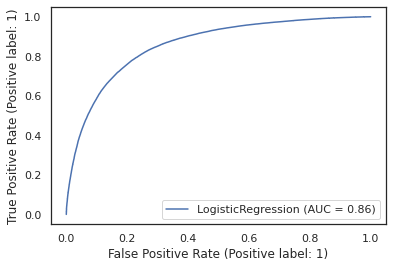

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score, classification_report, roc_curve
     

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(logistic_regression, X_test, y_test)


In [61]:
#accuracy score for logistic Regression
accuracy_score(y_test,y_pred) #accuracy

0.781625

In [62]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[60817 19461]
 [15479 64243]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78     80278
           1       0.77      0.81      0.79     79722

    accuracy                           0.78    160000
   macro avg       0.78      0.78      0.78    160000
weighted avg       0.78      0.78      0.78    160000



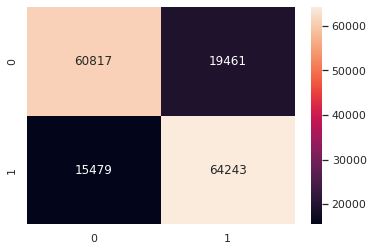

In [63]:
#visualizing confusion matrix
cm = confusion_matrix(y_test,y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')

#Model 2

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, max_depth = 8, max_features='sqrt')
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features='sqrt')

In [56]:
rf_y_pred = rf.predict(X_test)
rf_y_pred

array([0, 1, 1, ..., 0, 1, 0])

Importig the evaluation metrics

In [57]:
from sklearn.metrics import roc_auc_score
rf_log = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print("The AUROC Score of Random Forest classifier model",rf_log)

The AUROC Score of Random Forest classifier model 0.7343073180791829


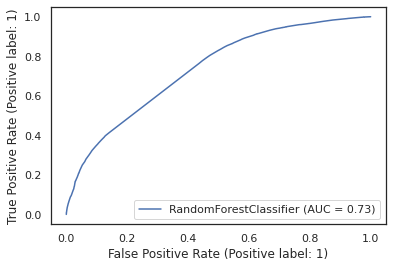

In [58]:
#plotting ROC Curve
RocCurveDisplay.from_estimator(rf, X_test, y_test)

In [65]:
print(confusion_matrix(y_test,rf_y_pred))
print(classification_report(y_test,rf_y_pred))

[[39539 40739]
 [13053 66669]]
              precision    recall  f1-score   support

           0       0.75      0.49      0.60     80278
           1       0.62      0.84      0.71     79722

    accuracy                           0.66    160000
   macro avg       0.69      0.66      0.65    160000
weighted avg       0.69      0.66      0.65    160000



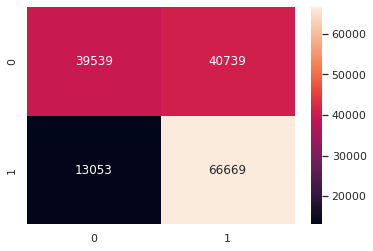

In [60]:
#visualizing confusion matrix
cm = confusion_matrix(y_test, rf_y_pred)
f = sns.heatmap(cm, annot=True, fmt='d')

AUROC Score obtained on Logistic regression of the twitter data = 0.86

Higher the AUROC Score, best is the model data

Summary:

Comparing the positive and negative tweets from Twitter sentiment data using Logistic Regression and Random forest Algorithms of Machine Learning..

Positive tweets are equal to the negative tweets....

Both models are giving a various results.since the logistic regression has given the AUROC score more,we are concluding the Logistic regression performing well in finding the patterns compared to Rondom forest